In [1]:
import sys
print(sys.executable)

C:\Users\GS\anaconda3\python.exe


In [3]:
!C:\Users\GS\anaconda3\python.exe -m pip show tensorflow

Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\GS\anaconda3\Lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, termcolor, typing-extensions, wrapt
Required-by: 


In [5]:
import tensorflow as tf

In [7]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [9]:
from skimage.io import imread
from skimage.transform import resize
import os
import numpy as np

In [11]:
Categories = ['cats', 'dogs']
flat_data_arr = []  # input array
target_arr = []  # output array

In [13]:
# Specify the main directory containing both training and testing subdirectories
main_datadir = 'D:/DataScience_and_MachineLearning/internship/Skillcraft_Technologies/task_3/'

In [15]:
# Iterate through both training and testing categories
for category in Categories:
    print(f'loading... category: {category}')

    # Specify the subdirectories for training and testing
    train_or_test_dirs = ['training_set', 'test_set']

    for train_or_test in train_or_test_dirs:
        # Form the complete path
        path = os.path.join(main_datadir, train_or_test, category)

        for img in os.listdir(path):
            img_array = imread(os.path.join(path, img))
            img_resized = resize(img_array, (40, 40, 3))  # Adjust the size as needed
            flat_data_arr.append(img_resized.flatten())
            target_arr.append(Categories.index(category))

        print(f'loaded {train_or_test} category: {category} successfully')

flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

loading... category: cats
loaded training_set category: cats successfully
loaded test_set category: cats successfully
loading... category: dogs
loaded training_set category: dogs successfully
loaded test_set category: dogs successfully


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [19]:
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape

(10022, 4801)

In [21]:
#input data
x=df.iloc[:,:-1]
#output data
y=df.iloc[:,-1]

In [23]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)

In [25]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x_train_scaled = scaler.fit_transform(x_train)
#x_test_scaled = scaler.transform(x_test)

In [27]:
# Reduce feature dimensions
pca = PCA(n_components=300)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [29]:
# Defining the parameters grid for GridSearchCV
param_grid = {
    'C': [1, 10],              # Reduce from 4 to 2 values
    'gamma': [0.01, 0.1],      # Reduce from 4 to 2 values
    'kernel': ['rbf']          # Focus on best-performing kernel
}

# Creating a support vector classifier
svc=svm.SVC(probability=True)

# Creating a model using GridSearchCV with the parameters grid
model = GridSearchCV(svc, param_grid, n_jobs=-1, verbose=2)

In [31]:
# Fit the model
model.fit(x_train_pca, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 10], 'gamma': [0.01, 0.1], 'kernel': ['rbf']},
             verbose=2)

In [33]:
# Testing the model using the testing data
y_pred = model.predict(x_test_pca)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)

# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

The model is 63.890274314214466% accurate


In [35]:
print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))

              precision    recall  f1-score   support

         cat       0.63      0.68      0.65      1002
         dog       0.65      0.59      0.62      1003

    accuracy                           0.64      2005
   macro avg       0.64      0.64      0.64      2005
weighted avg       0.64      0.64      0.64      2005



In [41]:
from skimage.io import imread
from skimage.transform import resize

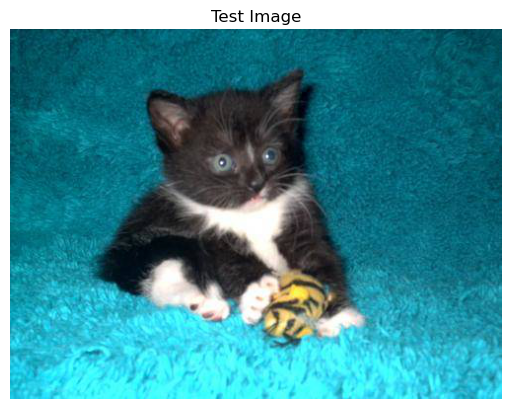

The predicted image is: cats


In [43]:
# Path to test image
path = 'D:/DataScience_and_MachineLearning/internship/Skillcraft_Technologies/task_3/test_set/cats/cat.4020.jpg'

# Read and display the image
img = imread(path)
plt.imshow(img)
plt.title("Test Image")
plt.axis('off')
plt.show()

# Preprocess
img_resize = resize(img, (40, 40, 3))
img_flattened = img_resize.flatten().reshape(1, -1)

# Apply the same PCA transform used in training
img_pca = pca.transform(img_flattened)

# Predict
pred = model.predict(img_pca)
print("The predicted image is: " + Categories[pred[0]])

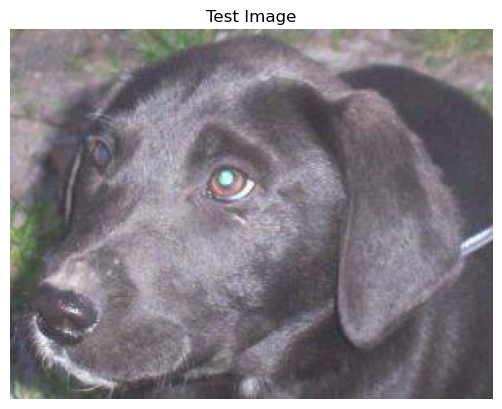

The predicted image is: dogs


In [45]:
# Path to test image
path = 'D:/DataScience_and_MachineLearning/internship/Skillcraft_Technologies/task_3/test_set/dogs/dog.4029.jpg'

# Read and display the image
img = imread(path)
plt.imshow(img)
plt.title("Test Image")
plt.axis('off')
plt.show()

# Preprocess
img_resize = resize(img, (40, 40, 3))
img_flattened = img_resize.flatten().reshape(1, -1)

# Apply the same PCA transform used in training
img_pca = pca.transform(img_flattened)

# Predict
pred = model.predict(img_pca)
print("The predicted image is: " + Categories[pred[0]])